# Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv(r'C:\Users\DELL\Desktop\dev\models\SUV_Bobby\SUV.txt')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Checking null values

In [2]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Effect of Gender on Purchase

<AxesSubplot:xlabel='Gender'>

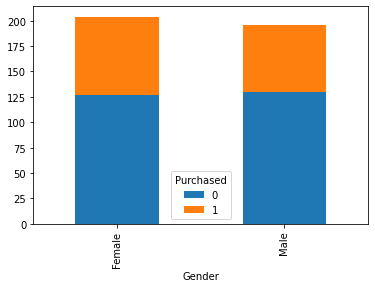

In [3]:
data.groupby(['Gender','Purchased']).size().unstack().plot(kind='bar',stacked=True)

# Effect of Age on Purchase

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

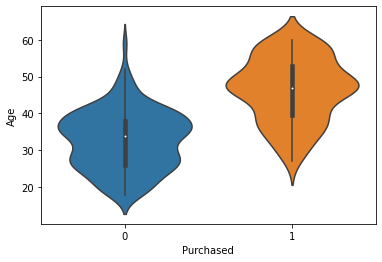

In [4]:
sns.violinplot(x='Purchased',y='Age',data=data)

# Effect of Salary on Purchase

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

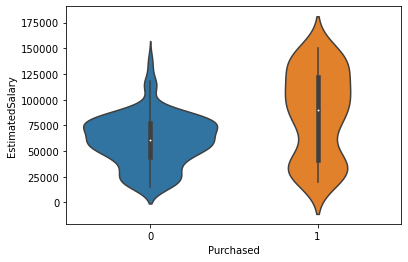

In [5]:
sns.violinplot(x='Purchased',y='EstimatedSalary',data=data)

# Distribution of Age and Salary over Purchase

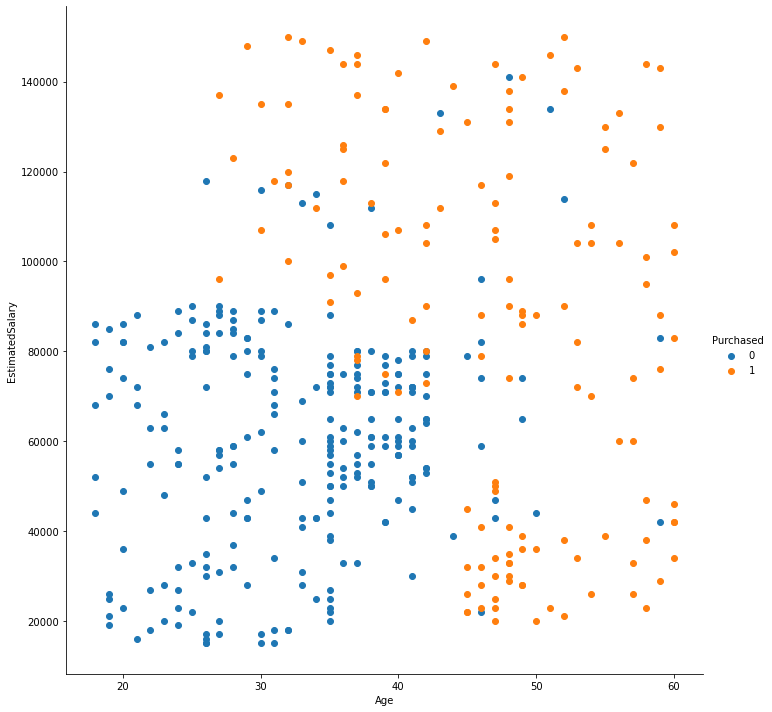

In [6]:
sns.FacetGrid(data=data,hue='Purchased',height=10).map(plt.scatter,'Age','EstimatedSalary').add_legend()

# Checking the outliers

Presence of outliers always affect the model selection

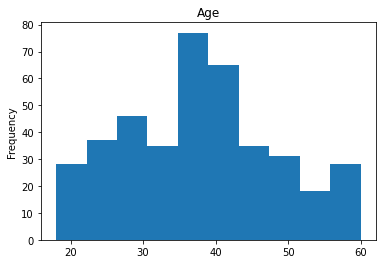

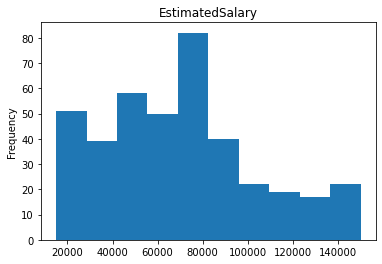

In [7]:
for feature in ['Age','EstimatedSalary']:
    data[feature].plot.hist()
    plt.title(feature)
    plt.show()

# Checking dataset balance

Prediction values are present in adequate ratio in dependant feature

In [8]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:>

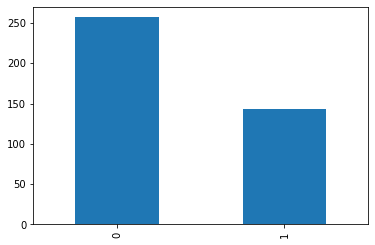

In [9]:
data['Purchased'].value_counts().plot.bar()

# Data preprocessing

#### Converting Gender feature to dummy

In [10]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

#### Scaling Age and Salary feature

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(data.iloc[:,1:-1])
y=data['Purchased']

# Logistic Regression
### 82%

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR_val=cross_val_score(LR,X,y,scoring='accuracy',cv=5)
LR_val.mean()

0.82

# Support Vector Machines
### 90%

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params={
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale', 'auto'],
    'C':[100, 10, 1.0, 0.1, 0.001]
}
SVM=SVC()
SVM_val=GridSearchCV(SVM,params,scoring='accuracy',cv=5,n_jobs=-1)
SVM_val.fit(X,y)
print('SVM best params:', SVM_val.best_params_)
print('SVM best score:', SVM_val.best_score_)

SVM best params: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
SVM best score: 0.9


# K Nearest Neighbors
### 90.75%

In [14]:
from sklearn.neighbors import KNeighborsClassifier
params={
    'n_neighbors' : range(1,40),
    'metric' : ['euclidean', 'manhattan', 'minkowski']
    }
knn=KNeighborsClassifier()
knn_val=GridSearchCV(knn,params,scoring='accuracy',cv=5,n_jobs=-1)
knn_val.fit(X,y)
print('SVM best params:', knn_val.best_params_)
print('SVM best score:', knn_val.best_score_)

SVM best params: {'metric': 'euclidean', 'n_neighbors': 10}
SVM best score: 0.9075


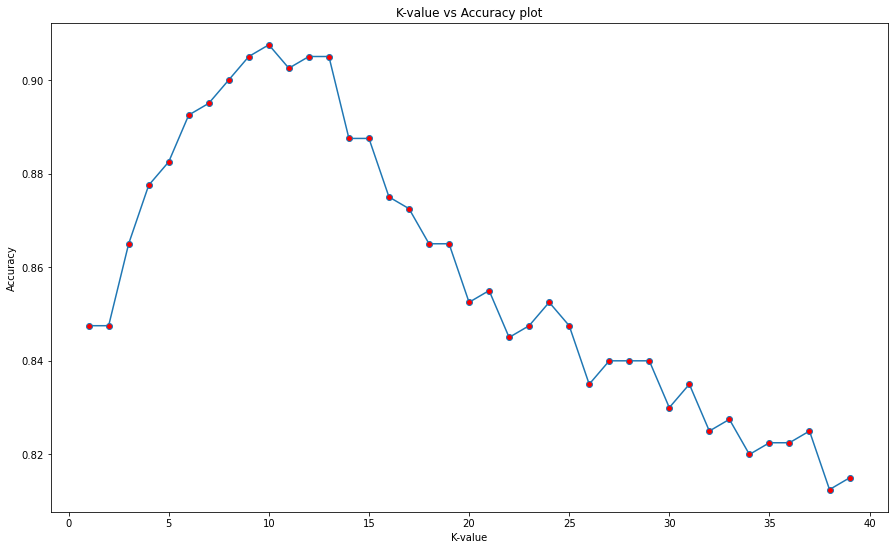

Maximum accuracy is 0.9075 at k value:  10


In [15]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(1,40):
    knn2=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn_val=cross_val_score(knn2,X,y,scoring='accuracy',cv=5,n_jobs=-1)
    accuracy.append(knn_val.mean())

plt.figure(figsize=(15,9))
plt.plot(range(1,40),accuracy,marker='o',markerfacecolor='r')
plt.title('K-value vs Accuracy plot')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()
print('Maximum accuracy is', max(accuracy), 'at k value: ', accuracy.index(max(accuracy))+1)

# Decision Tree Classifier
### 90.5%

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params={
    'criterion' : ['gini', 'entropy'],
    'max_features' : [1,2,3],
    'max_depth' : [10,20,30,40],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [10,9,8,7,6,5,4,3,2,1]
}
dtc_val=GridSearchCV(dtc,params,scoring='accuracy',cv=5,n_jobs=-1)
dtc_val.fit(data.iloc[:,1:4],data['Purchased'])
print('DTC best params:', dtc_val.best_params_)
print('DTC best score:', dtc_val.best_score_)

DTC best params: {'criterion': 'gini', 'max_depth': 30, 'max_features': 1, 'max_leaf_nodes': 7, 'min_samples_split': 5}
DTC best score: 0.905


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan 0.8325 0.83   ...    nan    nan    nan]
  warnings.warn(


# Random Forest Classifier
### 89.25%

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
params={
    'n_estimators': [100],
    'criterion' : ['gini', 'entropy'],
    'max_features' : [1,2,3],
    'max_depth' : [10,20,30,40],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [10,9,8,7,6,5,4,3,2,1],
    'n_jobs':[-1]
}
rfc_val=RandomizedSearchCV(rfc,params,scoring='accuracy',cv=5,n_jobs=-1)
rfc_val.fit(data.iloc[:,1:4],data['Purchased'])
print('DTC best params:', rfc_val.best_params_)
print('DTC best score:', rfc_val.best_score_)

DTC best params: {'n_jobs': -1, 'n_estimators': 100, 'min_samples_split': 9, 'max_leaf_nodes': 3, 'max_features': 3, 'max_depth': 20, 'criterion': 'gini'}
DTC best score: 0.8925000000000001


# Extreme Gradient Boosting Classifier
### 87.75%

In [21]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
params={
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'n_estimators': [50,70,85,100,125,150,175,200],
    'n_jobs': [-1]
    }
xgb_val=RandomizedSearchCV(xgb,params,scoring='accuracy',cv=5,n_jobs=-1)
xgb_val.fit(data.iloc[:,1:4],data['Purchased'])
print('XGB best params:', xgb_val.best_params_)
print('XGB best score:', xgb_val.best_score_)

[12:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB best params: {'n_jobs': -1, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
XGB best score: 0.8775000000000001


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
